# Pulsar Data Classification

## Introduction
Pulsars belong to a family of objects called neutron stars. These are basically “dead” stars – what results when a star more massive than the sun runs out of fuel and collapses on itself. Neutron stars are typically 20-24 km., but can contain twice the mass of the sun [[1]](https://www.space.com/32661-pulsars.html). A characteristic property of pulsars are their periodic bursts of emissions produced by their beams of light. 
 
To help properly classify a data sample as either a pulsar or noise (i.e. man-made frequencies), scientists use two “profiles”. The first profile, the integrated profile, is created by stacking the individual bursts of emission from a pulsar. Pulses arrive at different times across different radio frequencies, and to account for this scientists use the DM-SNR (“dispersion-measure-signal-to-noise-ratio”) curve, which constitutes the second “profile.”  

Our dataset contains eight columns, with each column representing a numerical characteristic of the pulsar candidates. Each variable appears once for the integrated pulse profile, and once for the DM-SNR curve. The variables are:

* Mean
* Standard deviation
* Kurtosis – (how heavily the tails of a distribution differ from the tails of a normal distribution)
* Skewness – (the asymmetry in a normal distribution)

What we want to know is, given the mean, standard deviation, kurtosis, and skewness of both the integrated profile and the DM-SNR curve of a sample of radio-wave radiation, is the source of the radiation a pulsar or noise?

[[1]](https://www.space.com/32661-pulsars.html) _What are Pulsars?_ Space.com

[[2]](https://as595.github.io/classification/) _Understanding Classification_ CSC2019 - University of Manchester

## Preliminary Exploratory Data Analysis

In [16]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)

#reading data from the web
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip", temp)
pulsar_file <- unz(temp, "HTRU_2.csv")
pulsar <- read_csv(pulsar_file, col_names = FALSE)
colnames(pulsar) = c("mean_integrated", "sd_integrated", "kurtosis_integrated", "skew_integrated", "mean_DMSNR", "sd_DMSNR", "kurtosis_DMSNR", "skew_DMSNR", "target_class")
pulsar = mutate(pulsar, target_class = as.factor(target_class))
head(pulsar)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)


mean_integrated,sd_integrated,kurtosis_integrated,skew_integrated,mean_DMSNR,sd_DMSNR,kurtosis_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


Using the training set, we summarized the data into the table below. We grouped by the target_class column, then used summarize to count the number of instances for each class.

In [15]:
pulsar_summarized <- pulsar %>%
    group_by(target_class) %>%
    summarize(n = n())
head(pulsar_summarized)


target_class,n
<fct>,<int>
0,16259
1,1639


Since we intend to use all the columns (apart from target_class) as predictors, we plotted all predictors against each other with ggpairs to look for general patterns in the training set. However, we are still looking for more effective visualizations.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



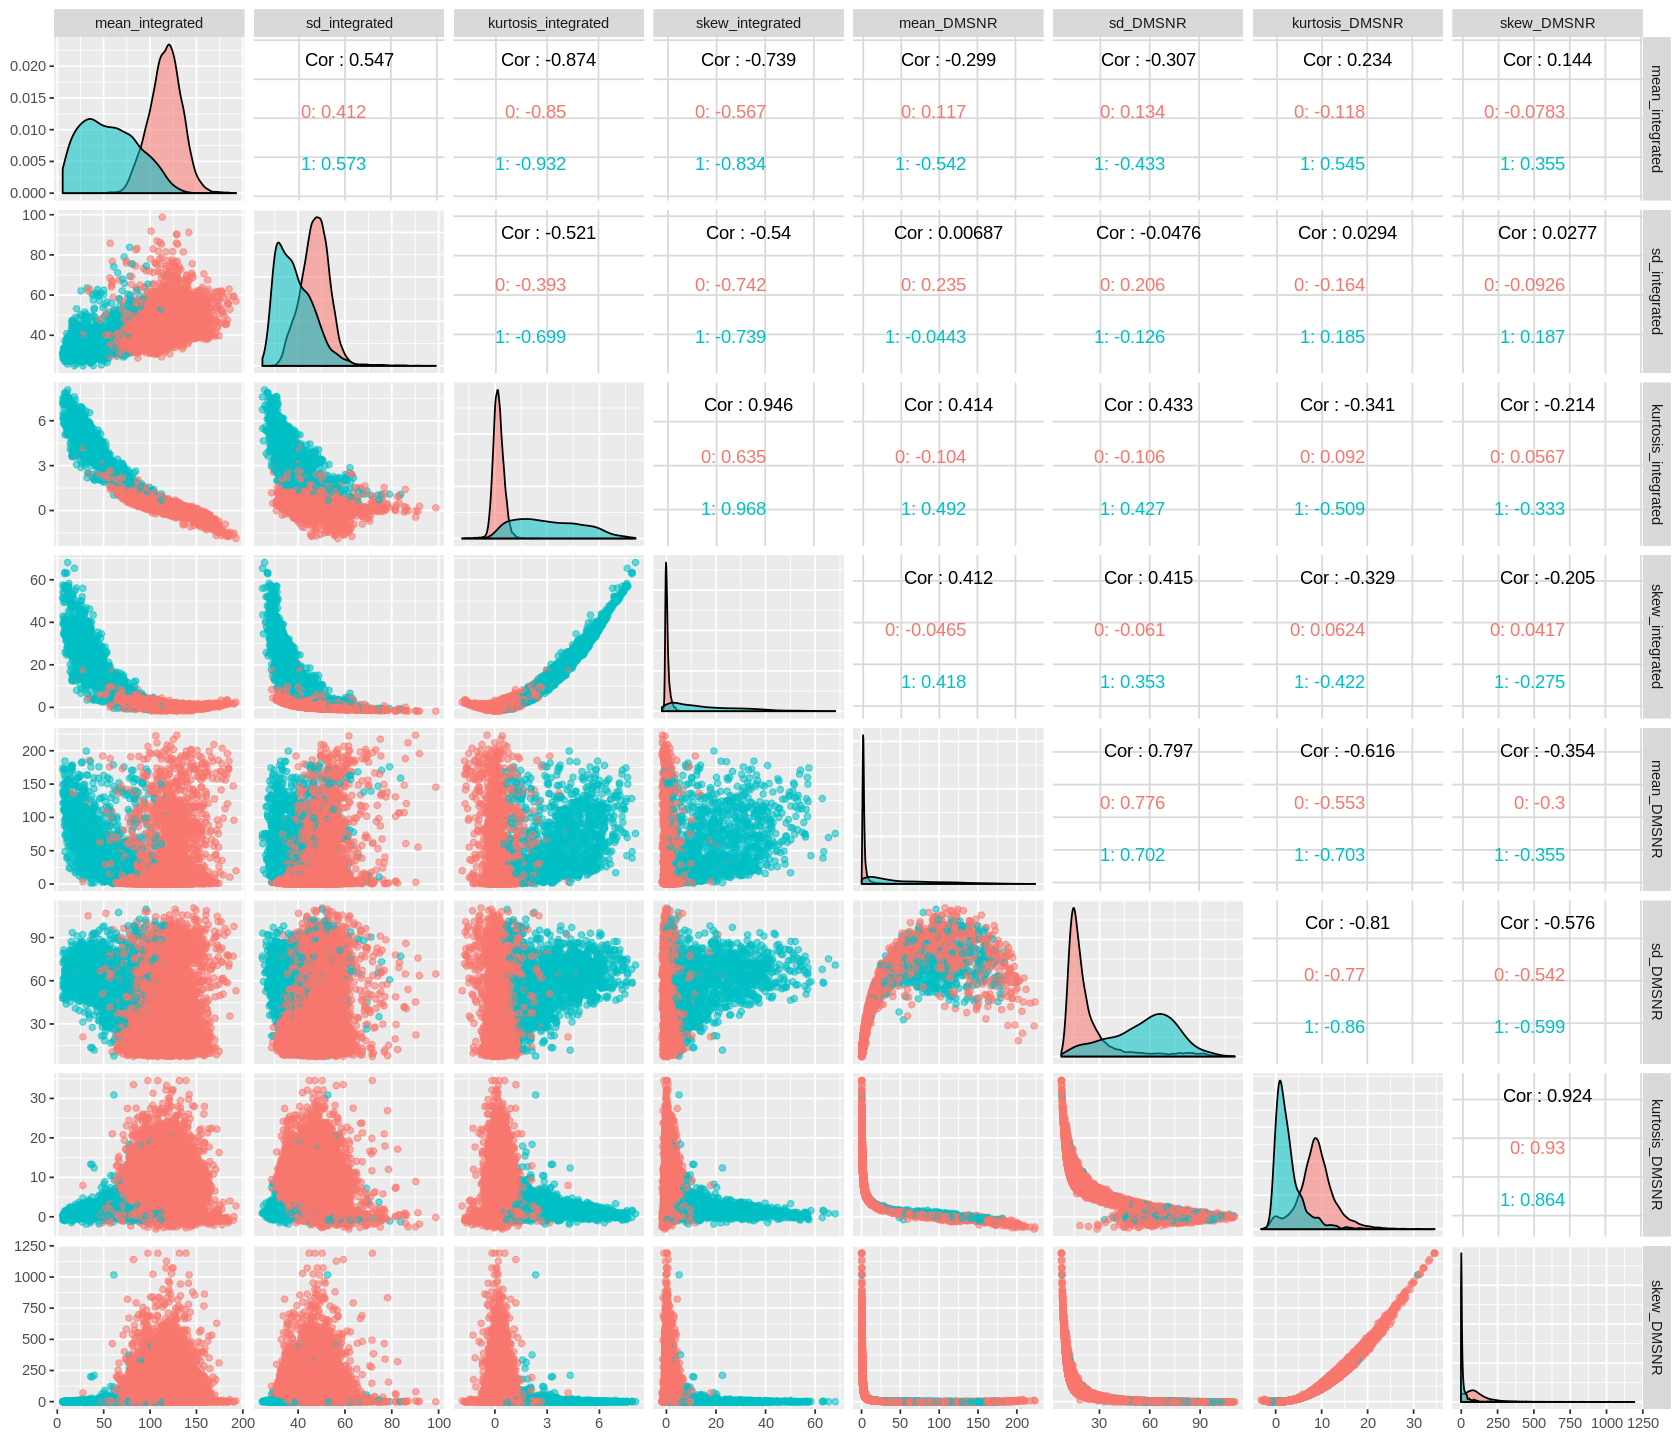

In [14]:
library(GGally)
options(repr.plot.width = 14, repr.plot.height = 12)
pulsar_all_plot <- ggpairs(pulsar, columns = 1:8, ggplot2::aes(colour=target_class, alpha = 0.1))
pulsar_all_plot

## Methods
* First, the columns of the raw data must be labelled. Then the data must be sliced into predictor variables and classes/labels. After slicing, both data frames will be standardized. The predictor variables will be left as a data frame. The classes/labels will first be converted into a factor data type, after which the data frame itself will be converted into a vector. At this point, all the data is ready to be fed into the classifier.


* We will be using the caret package to train a classifier using the k-nearest neighbours method. All variables except the target_class will be used as predictor variables, totalling eight. The target_class column will be used for the classes/labels. It contains a total of two categorical classes. An optimal k-value, one that yields the highest classification accuracy, will be selected through an automated process.


* A confusion matrix [[3]](https://en.wikipedia.org/wiki/Confusion_matrix) will be used to visualize the classification results.

[[3]](https://en.wikipedia.org/wiki/Confusion_matrix) _Confusion Matrix_ Wikipedia

## Expected outcomes and significance

We fully expect that after our data analysis and the creation of our matrix, we will be able to confidently predict whether a frequency is from a pulsar star or is man-made. This will be based upon the eight columns representing the numerical characteristic of the frequencies. Pulsars are useful to study extreme states of matter, test general relativity, and search for planets outside our solar system. In order to study them however, they first must be identified. If correctly identified and studied, understanding pulsar stars could greatly impact our current understanding of space. We could then use this knowledge to measure other cosmic distances, and could find answers for planets beyond our solar system and exactly how far away they are. 